In [1]:
from numpy import pi
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.visualization import plot_histogram

**The Statevector**

In quantum mechanics, the state of a system is described by an object called a wavefunction. We can represent the wavefunction of a system using a statevector $|\psi\rangle$. This vector more generally will live in a vector space called a Hilbert space. To write the components of the statevector, we need to choose a set of basis vectors $|e_{i}\rangle$. Our basis vectors allow us to express the statevector (and any vector in the space) $|\psi\rangle$ as a linear combination of the $|e_{i}\rangle$:

$|\psi\rangle = \sum a_{i}|e_{i}\rangle = \begin{bmatrix}
a_{0} \\
a_{1} \\
. \\
. \\
. \\
a_{n}
\end{bmatrix}$

The $a_{i}$ are called the components of the statevector in the $|e_{i}\rangle$ basis. In general, the $a_{i}$ are complex numbers.

In quantum computing the basis we most often use is the computational basis, also called the Z basis. In the computational basis, our basis vectors are written as $|0\rangle$ and $|1\rangle$. We can then represent the state of a qubit $|q\rangle$ in our quantum computer as a combination of these basis vectors:

$|q\rangle = q_{0}|0\rangle + q_{1}|1\rangle$



**Measurements, Eigensystems, and the Inner Product**

In order to discuss measurements and how quantum systems evolve, we need to introduce an operation called the inner product. In the previous section, we introduced vectors $|v\rangle$. This notation is called bra-ket notation. The vector $|v\rangle$ is a "ket" and can be thought of as a column vector. Likewise, we can form a "bra" by taking the complex conjugate of $|v\rangle$:

$\langle v| = |v\rangle^{*}$

$|v\rangle = \begin{bmatrix}
v_{1} \\
. \\
. \\
. \\
v_{n}
\end{bmatrix}$

$\langle v| = \begin{bmatrix}
v_{1}^{*} && . && . && . && v_{n}^{*}
\end{bmatrix}$

We define the inner product of a bra and ket to be:

$\langle a|b\rangle = \sum a_{i}b_{i}$

Where $a_{i}$ and $b_{i}$ are the components of $\langle a|$ and $|b\rangle$ respectivley. The magntiude of a vector $v$ is given by:

$\langle v|v\rangle = |v|$

Another concept we will need are eigensystems. Given some operator $O$, an eigenvector of $O$ is a vector $|v_{i}\rangle$ such that:

$O|v_{i}\rangle = \lambda_{i}|v_{i}\rangle$

where $\lambda_{i}$ is a complex number known as an eigenvalue. In quantum mecahnics, all of our operators corresponding to measuring an observable quantities are represented by "Hermitian operators," which have a property that their egienvalues are real, and their eigenvectors form a "complete set." This means that the eigenvectors of the operator form a basis for our space, which will come in very handy. In fact, this basis has an even nicer property: the basis vectors formed by the eigenvectors are "orthogonal," which means the inner product of any two vectors in our basis vanishes:

$\langle v_{i}|u_{j}\rangle = 0$ if $i \neq j$

We can also "normalize" our eigenvectors by dividing by their magnitude. This forms the same vector rescaled so that its magnitude is 1. The normalization property will be very helpful and can be done to any of our basis vectors, so from now on, we will assume our basis vectors have already been normalized.

In quantum mechanics, when we perform a measurement via operator $O$ of a quantum system represented by the statevector $|\psi\rangle$, the only possible results we can obtain are the eigenvalues of the operator $O$. If we obtain eigenvalue $\lambda_{j}$, the wavefunction undergoes a "collapse" into the corresponding eigenvector $|v_{j}\rangle$ of operator $O$:

$|q\rangle = \sum q_{i}|v_{i}\rangle \rightarrow$ Measure $O$ and obtain eigenvalue $\lambda_{j} \rightarrow |q$ after measurement $\rangle = |v_{j}\rangle$

Naturally, we may wonder what the probability of measuring $\lambda_{j}$ is for a quantum system in state $|q\rangle = \sum q_{i}|v_{i}\rangle$. We can calculate this by taking the inner product of $|q\rangle$ with the appropriate eigenvector $|v_{j}\rangle$ of the operator $O$ we are measuring, taking the magnitude of the result, and then squaring it:

Probability of Measuring $\lambda_{j}$ for Operator $O$ $= |\langle v_{j}|q\rangle|^{2} = |\langle v_{j}| \sum q_{i}|v_{i}\rangle|^{2} = |q_{j}|^{2}$

Therefore we find that in order to calculate the probability of obtaining $\lambda_{j}$ when measuring $O$ on a quantum state, we expand the quantum state in the basis given by the eigenvectors of $O$ (which we then ensure are normalized), then the probabilities are given by the amplitude squared of the coefficents $q_{j}$. This also gives us another property of the wavefunction and statevector: $|\sum q_{i}|^{2} = 1$. This just states the fact that when we make a measurement, we get something back as a result. This is called the "normalization condition" for the wavefunction.

Let's see a quick example of how these ideas work on a quantum computer. We first generate a quantum circuit with a qubit and classical bit, then apply a Hadamard gate to put the qubit in state $|q\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$. From our previous discussions, we can tell that we should have a 50% chance of measuring the qubit to be in state $|1\rangle$, and a 50% chance of finding it in state $|0\rangle$:

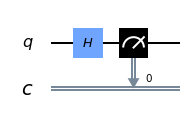

In [2]:
qc = QuantumCircuit(1,1)
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

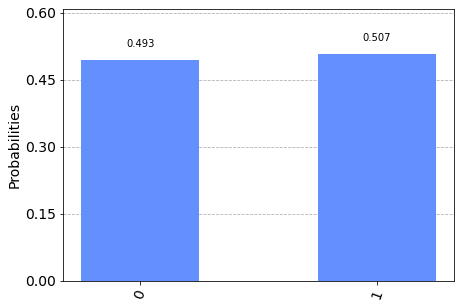

In [3]:
backend = Aer.get_backend('qasm_simulator')
counts = execute(qc,backend).result().get_counts()
plot_histogram(counts)

The small error we see comes from the fact that we are performing this measurement a finite number of times and averaging the result, so we will not recover the exact 50/50 probability experimentally.

**Entanglement**

We can represent the state of multiple qubits using the tensor product $\otimes$. Without going to deep into tensors, we can think of the tensor product as a way to "string together" multiple kets together so that they act as a function with multiple slots for bras when taking an inner product. For example, take the state:

$|q_{0}\rangle = |1\rangle$

$|q_{1}\rangle = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$

$|q_{0}\rangle \otimes |q_{1}\rangle = |q_{0}q_{1}\rangle = |1\rangle \otimes \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle) = \frac{1}{\sqrt{2}}(|1\rangle \otimes |0\rangle + |1\rangle \otimes |1\rangle) = \frac{1}{\sqrt{2}}(|10\rangle+|11\rangle)$

So now we could ask "what is the probability of measuring $q_{0}$ to be in state $|1\rangle$, and what happens to the state after we do this?" To answer this question, we do our usual process of taking the inner product of the statevector with the eigenvector of interest, but we also need to consider the fact that we are only interested in $q_{0}$ being in state $|1\rangle$, so we need to allow for $q_{1}$ to be in states $|0\rangle$ or $|1\rangle$:

Prob$(|q_{0}\rangle = |1\rangle) =$ Prob$(|q_{0}\rangle = |1\rangle$ AND $ |q_{1}\rangle = |0\rangle) +$ Prob$(|q_{0}\rangle = |1\rangle$ AND $ |q_{1}\rangle = |1\rangle)$

Prob$(|q_{0}\rangle = |1\rangle$ AND $ |q_{1}\rangle = |1\rangle)
= |\langle 11| \frac{1}{\sqrt{2}}(|10\rangle+|11\rangle)|^{2} = \frac{1}{2}|\langle 11|10\rangle + \langle 11|11\rangle|^{2} = \frac{1}{2}$

Prob$(|q_{0}\rangle = |1\rangle$ AND $ |q_{1}\rangle = |0\rangle)
= |\langle 10| \frac{1}{\sqrt{2}}(|10\rangle+|11\rangle)|^{2} = \frac{1}{2}|\langle 10|10\rangle + \langle 10|11\rangle|^{2} = \frac{1}{2}$

Prob$(|q_{0}\rangle = |1\rangle) = \frac{1}{2}+\frac{1}{2} = 1$

Let's look at a more interesting state:

$|q_{0}q_{1}\rangle = \frac{1}{\sqrt{2}}(|11\rangle + |00\rangle)$

This state is important because _the state cannot be represented as the tensor product of two independent qubits_. Try as we might, there is no combination of independent qubits that together form this state! This state is our first introduction to the concept of entanglement in quantum mechanics. An entangled state is a quantum state in which a pair (or more) of particles cannot be described independent of one another, but instead must be considered as a system as a whole. That is, _the two qubits do not have a well defined state independent of each other_. Let's see how we can build this entangled state on a quantum computer. It ends up being relativley straightforward; we only need two qubits, a Hadamard gate, and a CNOT gate. The state is contructed as follows:

**Step 1**: Initialize two qubits in state $|00\rangle$

**Step 2**: Apply Hadamard gate to first qubit $q_{0}$, creating new state given by

$|q_{0}q_{1}\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|10\rangle)$

**Step 3**: Apply a CNOT gate to the state, with $q_{0}$ as the control and $q_{1}$ as the target

$|q_{0}q_{1}\rangle = \frac{1}{\sqrt{2}}($CNOT$|00\rangle+$CNOT$|10\rangle) = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$

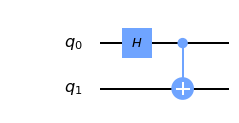

In [4]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

In [5]:
backend = Aer.get_backend('statevector_simulator')
final_state = execute(qc,backend).result().get_statevector()
print(final_state)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


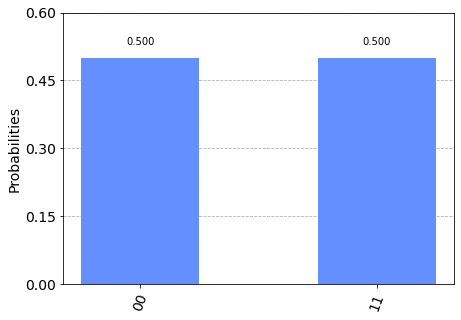

In [6]:
results = execute(qc,backend).result().get_counts()
plot_histogram(results)

where the format of qiskit's statevector for multiqubit states gives us the coefficents of the basis vectors in the order [$|00\rangle$, $|01\rangle$, $|10\rangle$, $|11\rangle$].

This state ended up causing quite an issue in 20th century physics. To see why, consider creating a pair of particles in an entangled state such as our qubit state $|q_{0}q_{1}\rangle = \frac{1}{\sqrt{2}}(|00\rangle+|11\rangle)$. We create this state and then seperate the two particles represented by $q_{0}$ and $q_{1}$, we can imagine seperating them even by light years. Now, let's measure one of the particles, say $q_{0}$, whcih is seperated from $q_{1}$. After this measurement, we measure $q_{0}$ to be in the state $|0\rangle$. Immediatly, the state must collapse into $|q_{0}q_{1}\rangle = |00\rangle$. This implies that somehow, the other entangled particle $q_{1}$ seperated across space _knew_ we made a measurement of $q_{0}$ and collapsed into the appropriate state! 

In relativity, it is a well known fact that information cannot travel faster than the speed of light, but the other qubit seemed to know instantaneously about the state of the measured qubit. This is what is described as "spooky action at a distance" and the "EPR Paradox." Many physicist such as Einstein found this troubling, and proposed that there were "hidden variables" in quantum mechanics. These variables would predefine the system and dictate how it evolves such that our measurements seem correlated. Einstein and others argued that quantum mechanics was incomplete, and this is why we had to use probabilities to guess what the state of the system may be. The goal of a hidden variables theory of quantum mechanics is to preserve two concepts: locality and realism.

* Locality: an object is directly influenced only by its immediate surroundings, there is no "spooky action at a distance." This idea is conveyed in relativity where no signal can travel faster than the speed of light, preventing instantaneous interactions.



* Realism: nature exists independently of the human mind. Even if the result of a possible measurement does not exist before the act of measuring it, that does not mean it is a creation of the mind of the observer. In this sense, the real world does have a determenistic property to it, our theory of quantum mecahnics just does not fully capture nature.

Turns out, there is a way to test if any hidden variables theory is correct! This is where Bell's inequality comes in.

**Bell's Inequality (and some socks)**

 The idea here is to come up with some experiment that can be solved using a hidden variable theory and using quantum mechanics, then seeing if the two agree or disagree. For the hidden variables experiment, we will consider a setup most of us should be familiar with: socks in the wash.
 
* The Hidden Variables Experiment

Imagine we have a bunch of different pairs of socks, each pair having a different strength, but the socks in the pair having the same strength. This is like our entanglement, if we know the strength of one sock then we know the strength of the other in the pair. When we put the socks in the wash, they could be destroyed depending on the temperature of the wash. Let's say we have three washing machines at different temperatures:

$W_{1}$ with temperature $0^{\circ}$ F

$W_{2}$ with temperature $120^{\circ}$ F

$W_{3}$ with temperature $240^{\circ}$ F

To start out, imagine we grab a pair of socks, which necessarily have the same strength, and they survive a test wash in a $150^{\circ}$ F wash, but any hotter and they will break down. We now randomly throw the two socks in _different_ washers, so 2 of the 3 washes will have a sock in them. We can ask the question, "what is the probability that the two socks have the same result: both being destroyed or both surviving?" Well we can write down the result for each wash, by writing P for "pass" (the sock did not get destroyed) and F for "fail" (the sock did get destroyed). For the current experiment, we would write $(P,P,F)$ where the order is $(W_{1},W_{2},W_{3})$, as a sock will only get destroyed if it is put in $W_{3}$. If we put the pair in seperate washers, we can see that the probability that both socks act the same way is $\frac{1}{3}$ (the socks can only both pass, they cannot both fail as there is only one washer where they fail). Explicitly, the possible cases are:

Sock 1 in $W_{1}$, Sock 2 in $W_{2} \rightarrow$ Both Pass

Sock 1 in $W_{2}$, Sock 2 in $W_{1} \rightarrow$ Both Pass

Sock 1 in $W_{1}$, Sock 2 in $W_{3} \rightarrow$ One Pass, One Fail

Sock 1 in $W_{3}$, Sock 2 in $W_{1} \rightarrow$ One Pass, One Fail

Sock 1 in $W_{2}$, Sock 2 in $W_{3} \rightarrow$ One Pass, One Fail

Sock 1 in $W_{3}$, Sock 2 in $W_{2} \rightarrow$ One Pass, One Fail

Prob ( Both Act the Same ) = $\frac{2}{6} = \frac{1}{3}$

Now, let's form the possible permutations of passing and failing in the washers and see what they look like:

$(P,P,P)$

$(P,P,F)$

$(P,F,P)$

$(F,P,P)$

$(F,F,P)$

$(F,P,F)$

$(P,F,F)$

$(F,F,F)$

With the exception of $(P,P,P)$ and $(F,F,F)$, each case has two washers that act the same way, and one that acts differently. From the same argument as our test case, we conclude that in each of these cases the probability that the socks act identaically is $\frac{1}{3}$. In the $(P,P,P)$ and $(F,F,F)$ cases, the socks act identically no matter what, so the probability is just 1. In the end, we then see that given any washer arrangement, we are can say that if we randomly throw a pair of socks of the same strength into two different washers, the probability that the socks act identically is $\geq \frac{1}{3}$

This is like a hidden variables experiment. We did not know the strength of the socks beforehand, only that the pair had the same strength. The outcome of the experiment was pre-determined at the start, we just didn't have all the information (the hidden variable: sock strength) to know the outcome. Regardless, we were able to calculate a probability for the socks to act the same in any possible situation. Keep this result in mind as we look at the quantum mecahnical analogue.

* The Quantum Mechanics Experiment

For the quantum mechanical experiment, we start by considering photons in certain polarization states. At the end of the experiment, we will link back to show how this is an equivalent experiment to the sock setup, just in the setting of quantum mechanics.

The polarization of light tells us the direction the electric field is oriented in an electromagnetic wave, and we can also describe the polarization of a photon in the same way. We will start with our orthonormal basis states: horizontal polarization $|H\rangle$ and vertical polarization $|V\rangle$. We consider $|H\rangle$ to be the case where the photon's polarization is at $0^{\circ}$, and $|V\rangle$ to be where the photon's polarization is at $90^{\circ}$. We can then represent other angles of polarization by taking linear combinations of $|H\rangle$ and $|V\rangle$. For example, the $45^{\circ}$ polarization state would be represented as $\frac{1}{\sqrt{2}}(|H\rangle+|V\rangle)$ as it is halfway between a horizontal and vertical polarization.

We also introduce the idea of a polaroid, which as a transparent material that only lets through photons of the same polarization as the polaroid. This can be thought of as a measurement operator that measures the orientation of the photon's polarization. To find probabilities, we take the inner product of the photon's state with the orientation of the polaroid. For example, a photon in the $|H\rangle$ state will have a 100% chance of making it through a horizontal polaroid ($|\langle H|H\rangle|^{2} = 1$), but a photon in the $|V\rangle$ state will have a 0% chance of making it through the horizontal polaroid ($|\langle H|V\rangle|^{2} = 0$). By a similar calculation, a photon in the $45^{\circ}$ state will have 50% chance of making it through a horizontal or vertical polaroid ($|\langle H|\frac{1}{\sqrt{2}}(|H\rangle+|V\rangle)|^{2} = \frac{1}{2}$, similar for $\langle V|$). More generally, it can be shown that quantum mechanics predicts that if $\theta$ is the angle between the photon polarization and polaroid orientation, the probability that the photon passes through the polaroid is given by cos$^{2}(\theta)$.

We consider the entangled polarization state of two photons, $|\gamma_{1}\gamma_{2}\rangle = \frac{1}{\sqrt{2}}(|HH\rangle+|VV\rangle)$. We then setup three polaroids: $P_{1}$ at $0^{\circ}$, $P_{2}$ at $120^{\circ}$, and $P_{3}$ at $240^{\circ}$. We want to examine the results of an experiment where we pass the each of the entangled photons through seperate polaroids, and measure how often both photons pass throught their respective polaroids or both get blocked by their polaroids. The symmetry of the polaroids is nice, each one is seperated by $120^{\circ}$. This means that we only need to calculate the probability of this occurence in one setup, for example the case where $\gamma_{1}$ passes through the $0^{\circ}$ polaroid and $\gamma_{2}$ passes through the $120^{\circ}$ polaroid. This is because the resulting angles $\theta$ we consider between the $|H\rangle$ and $|V\rangle$ states will be the same in any polaroid setup, or offset by $180^{\circ}$ which introduces a negative sign to cos$(\theta)$ and therefore does not affect the probabilites cos$^{2}(\theta)$. Since the probabilites will work out the same for any setup, we just focus on the one described with $\gamma_{1}$ passing through the $0^{\circ}$ polaroid and $\gamma_{2}$ passing through the $120^{\circ}$ polaroid. What's the probability that the photons act the same way? Let's see:

Prob ( Photons both Pass through Polaroid) = Prob $( \gamma_{1} = |H\rangle )$Prob$(\gamma_{1} = |H\rangle $ AND $\gamma_{2} = 120^{\circ})$

Prob ( Photons both Blocked by Polaroid) = Prob $( \gamma_{1} = |V\rangle )$Prob$(\gamma_{1} = |V\rangle $ AND $\gamma_{2} = 210^{\circ})$

Prob ( Photons Act Identically ) = Prob ( Photons both Pass through Polaroid) + Prob ( Photons both Blocked by Polaroid)

The reason we have a product is that the first term is the probability that our entangled state collapses into $|HH\rangle$ or $|VV\rangle$ state as it has a 50% chance of being either state, so the first term in the product is $\frac{1}{2}$ in both cases. Next, we check the probability that the outcome we want actually occurs (both passing or both getting blocked). We note that in the "both pass" case, the state initially collapses to $|HH\rangle$ when the first photon passes through the $0^{\circ}$ polaroid and we measure it. Then, the probability that the second photon makes it through the $120^{\circ}$ polaroid will be given by cos$^{2}(120^{\circ}) = \frac{1}{4}$, so that is the value of the second term in the product for the first case. We will get the same probability for a photon in the $|V\rangle$ failing to pass through the $120^{\circ}$ polaroid, as that would be equivalent to it being at a right angle to the polaroid (i.e. at a polarization angle $210^{\circ}$, which is $120^{\circ}$ away from the $|V\rangle$ state). Therefore, we find:

Prob ( Photons Act Identically ) = $\frac{1}{2}\frac{1}{4} + \frac{1}{2}\frac{1}{4} = \frac{1}{4}$

As we stated before, this will be the case for sending the entangled photons through any two seperate polaroids by the symmetry of the setup.

* Connecting the Two Experiments

So how is the photon experiment a quantum mechanical mirror to our hidden variables sock experiment? Our polaroids will correspond to our washers: the sock passing or failing is equivalent to our photon passing or being blocked by a polaroid, it is a measurement of the property we are interested in. We send the pair of objects through seperate conditons, and measure how often they have an identical result. The particles of interest (or socks) are in an entangled state, where their strength or polarization is identical but unknown to the observer before the experiment is done. The main distinction between the two experiments is:

In the sock experiment, _the outcome of the experiment is pre-determined as the socks have a defined strength regardless of whether we know that strength_. 

In the photon experiment, _the outcome of the experiment is not pre-determined, as the photons are actually in a superposition between being horizontally and vertically polarized and not in a definite state_.

If our photons did have a hidden variable that determined the outcome of the experiment when the photons were created (i.e. the variable determined that the two photons would be in the states $|H\rangle$ and $120^{\circ}$ when measured), we would see that the photons acted exactly like the socks. However, going through the calculations we found that the photons act identically $\frac{1}{4}$ of the time, whereas if the hidden variables theory was correct we calculated that they should act identiaclly $\geq \frac{1}{3}$ of the time! Clearly, these two disagree as $\frac{1}{4} \lt \frac{1}{3}$, so we are in luck and have found an experiment to test which theory is correct: hidden variables or quantum mechanics. If we can recreate this photon experiment, then we can see if the probabilites follow quantum mechanics or hidden variables theory.

* Implementing the Experiment in Qiskit

In Qiskit, we can start by identifying the $|H\rangle$ state with $|0\rangle$ and the $|V\rangle$ state with $|1\rangle$. This is natural as they form an orthonormal basis for our space. The tricky part now is trying to see how we can perform the polarization measurments that a polaroid effectivley performs. We note that the state $\frac{1}{\sqrt{2}}(|H\rangle+|V\rangle) = \frac{1}{\sqrt{2}}(|0\rangle+|1\rangle)$ would correspond to a $45^{\circ}$ polarization for a photon, but represents a $90^{\circ}$ rotation about the X-axis for the qubit statevector on the Bloch sphere. Additionally, to send a $|H\rangle$ state to $|V\rangle$ state, we need to rotate the polarization by $90^{\circ}$; to send a $|0\rangle$ state to a $|1\rangle$ state we perform a $180^{\circ}$ rotation about the X-axis for the qubit on the Bloch sphere. By now, we notice that an angle of $\theta$ in the polarization sense corresponds to an angle of $2\theta$ in the qubit sense. Now we can start building the experiment. We start by creating a quantum circuit with two qubits as our "photons" and two classical bits for measurements. Then, we set the initial state of the qubits to be an entangled state equivalent to the entangled polarization state:

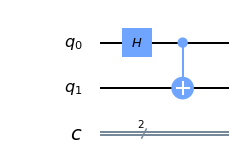

In [7]:
# SETUP CIRCUIT
qc = QuantumCircuit(2,2)
qc.h(0)
qc.cx(0,1)
qc.draw('mpl')

To perform measurements at an arbitrary angle $\theta$, we simply sandwich a measurement of the qubit between two $R_{x}(\theta)$ gates. In reality, we do not care about the second $R_{x}(\theta)$ gate as all that does is rotate the qubit so that it points along the $\theta$ direction if it collapsed into $|0\rangle$ when it was measured (this would be like a "pass" for our experiment, the photon made it through the filter) so that we get the proper wavefunction collapsing into the measured state. Since we don't do anything with the state after the measurement, we don't need the second gate and just want to see if the result was a $|0\rangle$ or $|1\rangle$. Therefore, we add a $0^{\circ}$ polaroid in the form of a measurement on $q_{0}$; a result of $|0\rangle$ will be a "pass" and a result of $|1\rangle$ will be a "blocked." As described earlier, we then will perform a $240^{\circ}$ (double the $120^{\circ}$ polaroid) rotation and then measurement on $q_{1}$:

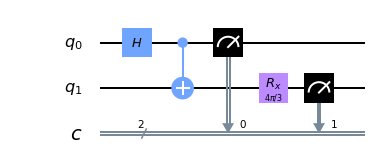

In [8]:
# SETUP CIRCUIT
qc_exp = QuantumCircuit(2,2)
qc_exp.h(0)
qc_exp.cx(0,1)
# MEASUREMENTS
qc_exp.measure(0,0)
qc_exp.rx(4*pi/3,1)
qc_exp.measure(1,1)
qc_exp.draw('mpl')

Now, let's examine the simulated results:

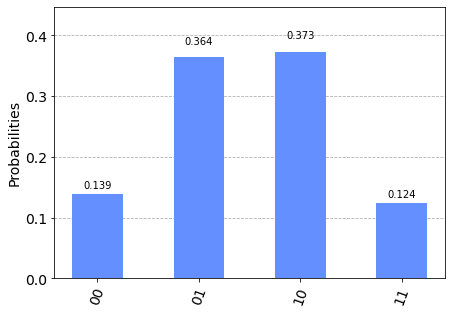

In [9]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc_exp,backend).result().get_counts()
plot_histogram(results)

Doing the math, we see that the sum of the probabilites of the $|00\rangle$ and $|11\rangle$ states is nearly $\frac{1}{4}$ and clearly less than $\frac{1}{3}$. The sceptical reader will note two things:

1) The probability isn't exactly 25%.

This is because we performed the calculation a finite number of times, so we will not get exaclty 25% in the end but will approach that value as we increase the amount of trials we perform.

2) We ran this on a simulator, meaning it did all the math according to quantum mechanics and we didn't actually use real entangled qubits!

You're correct. This was a good way to verify our code was working (it followed the quantum result as we would expect a quantum mechanics simulator to do). Time to test it on a real quantum computer! In order to run these next lines, you will need to have set up your credentials on IBM's quantum computers already in order to submit jobs:

In [20]:
IBMQ.load_account()

ibmqfactory.load_account:WARNING:2020-07-01 09:44:23,121: Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [21]:
provider = IBMQ.get_provider('ibm-q')

In [22]:
qcomp = provider.get_backend('ibmq_16_melbourne')

In [34]:
job = execute(qc_exp,backend=qcomp)

In [35]:
from qiskit.tools import job_monitor

In [36]:
job_monitor(job)

Job Status: job has successfully run


In [37]:
result = job.result()

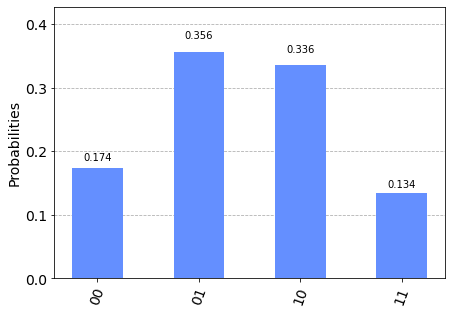

In [38]:
plot_histogram(result.get_counts(qc_exp))

If you perform this on the IBM quantum computers, you should be able to verify that the result is almost the same as the simulator, with slightly more error as happens in the real world. We have therefore proved Einstein wrong! A hidden variables theory cannot be correct, and quantum mechanics made the correct predictions.

This result means that, indeed, the two qubits were not generated with a predefined state, but instead in an entangled state. The state did collapse without any possible local interactions between the particles, so quantum mechanics is, in this sense, inherently nonlocal. Some argue that quantum mechanics is still local, as we cannot choose the outcome of the measurement (force it to be in state $|00\rangle$ or $|11\rangle$). This would mean we cannot send any meaningful signal, just random noise, so no _information_ is being instantaneously transmitted. Regardless, this "spooky action at a distance" has been a long discussed issue in physics.

We also find that in this version of quantum mechanics, we must abandon the concept of realism (this is not necessarily the case for some other interpretations of quantum mechanics). The matter we are measuring does not seem to have inheret properties (such as the value of the qubits) until we make a measurement of them. We then have no way of saying that this property exists independently of the human mind; it took some sort of "measurement" in order to force the system to take on a definite property.

Before concluding, we want to mention some other interesting interpretations of quantum mechanics as well as a brief description of them. These interpretations often try to describe what really is occuring during a wavefunction collapse, what entanglement is, or what constitutes a "measurement" of a quantum system. This list is by no means comprehensive, but serves as a good resource for anyone interested in more philisophical interpretations of quantum mechanics:

* **Copenhagen Interpretation**: By far the most standard interpretation of quantum mechanics. Claims that the observer is isolated from the quantum system, and only the quantum system is modeled by quantum mechanics. A measurement randomly picks out a result based on the probabilites quantum mechanics prescribes. The value of a measured parameter is not well defined before a measurement, and asking what its value is before a measurement is meaningless. Leaves issues with nonlocality, realism, wavefunction collapse, and measurement that we have discussed.

* **Quantum Bayesianism (QBism)**: Quantum mechanics informs the observer, or agent, what their degree of belif should be in obtaining a certain measurement from a quantum system. A quantum state is not a real object, just a tool to define our degree of belief. Often cited as an anti-realist interpretation of quantum mechanics for this reason.

* **Many Worlds (Everett Interpretation)**: The wavefunction collapse never occurs; instead, after a measurement the Universe branches into a series of parallel universes in which every possibl outcome did occur. The probabilites of quantum mechanics coincide with the question of "which branch would I end up on afer the measurement?"

* **Bohmian Mechanics**: The wavefunction evolves accoring to Schrodinger's equation, and the wavefunction guides the particles. The particles have definite positions the entire time, and so there is no question of "what constitutes as a measurement" and "what is a wavefunction collapse." Inherently non-local, but is a hidden variables theory. The nonlocal hidden variables allow it to satisfy Bell's inequality.